In [1]:
#Cargamos las librerias a utilizar.

%matplotlib inline
import pandas as pd # Trabajo de Dataframes
import seaborn as sns # Trabajo con plots estadisticos
import numpy as np # Trabajo con matrices
import matplotlib.pyplot as plt # Plots mas simples


In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [8]:
# Ojo la carpeta donde se guarda.
df = pd.read_csv('data/train.csv', index_col=['id'], parse_dates=['fecha'], error_bad_lines=False)

In [4]:
#df.describe(include='all')

In [10]:
withAmenities = df.loc[(df.piscina==1) & (df.gimnasio==1) & (df.usosmultiples==1)]
# Comparar distribuciones cuando hay ammenities

In [11]:
print(len(df.loc[df.escuelascercanas==1]))
print(len(df.loc[df.centroscomercialescercanos==1]))
print(len(df.loc[(df.escuelascercanas==1) & (df.centroscomercialescercanos==1)]))
len(df)

106594
95168
87915


240000

In [12]:
df.groupby('provincia').agg({'antiguedad':'mean'}).sort_values('antiguedad')

,antiguedad
provincia,
Baja California Sur,2.46
Yucatán,3.07
Hidalgo,3.47
Tlaxcala,3.69
Querétaro,3.70
Campeche,3.91
San luis Potosí,3.98
Quintana Roo,4.54
Puebla,4.55


In [5]:
regiones = pd.read_csv('data/regionesMexico.csv')

In [ ]:
df = df.merge(regiones,on='provincia', how='inner')

In [ ]:
df.groupby('zona').agg({'precio':'mean'}).sort_values(by='precio')

In [ ]:
categories = df.groupby('zona').agg({'precio':'mean'}).sort_values(by='precio').index.tolist()
#df.boxplot(column='precio', by='zona', rot=45)
sns.boxplot(df['zona'], df['precio'], order=categories)
plt.ylim(0,0.8E7)
plt.xticks(rotation=45)

In [ ]:
df2 = df[['antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio']]
#df2['allAm']=(df2['piscina'] == True) & (df2['gimnasio'] == True) & (df2['usosmultiples'] == True)
df2["metros"] = df2[["metrostotales", "metroscubiertos"]].max(axis=1)

corr = df2.corr()
# plot the heatmap
sns.heatmap(corr) 
#        xticklabels=corr.columns,
#        yticklabels=corr.columns)

In [ ]:
df

In [ ]:
from sklearn.preprocessing import StandardScaler
df2.dropna(inplace=True)
df.reset_index(inplace=True)

x = StandardScaler().fit_transform(df2)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['index']]], axis = 1)


In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
#targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
#colors = ['r', 'g', 'b']
#for target, color in zip(targets,colors):
#    indicesToKeep = finalDf['target'] == target
ax.scatter(finalDf['principal component 1'], finalDf['principal component 2'], s = 50)
#ax.legend(targets)
ax.grid()

In [ ]:
# COMPLETAR EL PCA CORRELATION CIRCLE

In [ ]:
sns.distplot(df['precio']);

In [ ]:
sns.boxplot(df['precio'])

In [5]:
# BUSCAR UN GRÁFICO QUE MUESTRE análisis de outliers
#¿Qué tipo de propiedad son los outliers?
#¿En qué zonas quedan?
from scipy import stats
outliers = df.loc[(np.abs(stats.zscore(df.precio)) > 3)]
#outliers

In [ ]:
sns.boxplot(outliers['metrostotales'])
plt.show()
sns.boxplot(df['metrostotales'])

In [ ]:
outliers.loc[outliers.metrostotales<50]

In [ ]:
#Detectar inconsistencias
#¿Qué datos expresan el tamaño de la casa?
#baños, habitaciones, garage
#baños*3+habitaciones*10+

In [ ]:
# Probar si tomar el máximo de metrostotales / metroscubiertos 
# correlaciona mejor o peor con el precio que cada una por separado

In [31]:
print(len(df.loc[df['metrostotales']<df['metroscubiertos']]))
print(len(df.loc[df['metrostotales']==df['metroscubiertos']]))
print(len(df.loc[df['metrostotales']>df['metroscubiertos']]))
print(len(df.loc[(df['metrostotales'].isnull() | df['metroscubiertos'].isnull())==True]))
print(len(df.loc[(df['metrostotales'].isnull() & df['metroscubiertos'].isnull())==True]))
print(len(df))

70295
37884
62954
68867
0
240000


In [6]:
df['metrosdescubiertos'] = df['metrostotales']-df['metroscubiertos']
#df[['metrostotales', 'metroscubiertos', 'metrosdescubiertos']]

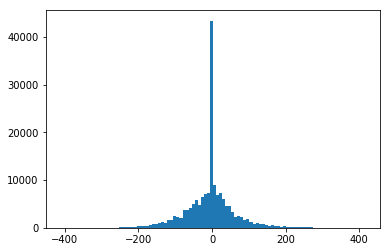

In [15]:
plt.hist(df['metrosdescubiertos'].dropna(), bins=100);

In [32]:
df['maxMetros'] = df[["metrostotales", "metroscubiertos"]].max(axis=1)

df['metros'] = df.metroscubiertos.fillna(df.metrostotales)

Text(0.5,1,'Matriz de correlaciones')

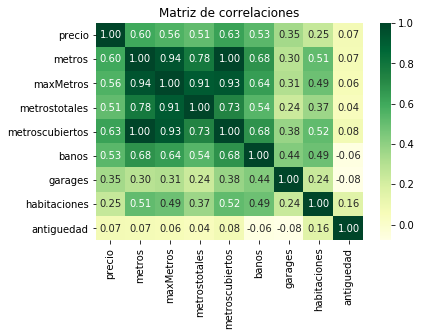

In [33]:
# Creamos una matriz de correlaciones solo para las variables cuantitativas.
variables_cuantitativas = ['precio', 'metros', 'maxMetros', 'metrostotales','metroscubiertos','banos','garages','habitaciones','antiguedad']
cm= df[variables_cuantitativas].corr()
hm = sns.heatmap(cm,annot=True,fmt='.2f',cmap="YlGn")
hm.set_title('Matriz de correlaciones')

Text(0.5,1,'Matriz de correlaciones')

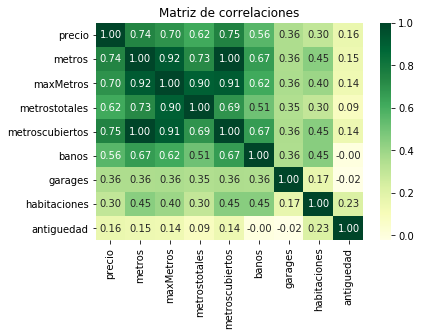

In [41]:
withoutOutlierts = df.loc[~(np.abs(stats.zscore(df.precio)) > 3)]
casasWithoutOutlierts = df.loc[df.tipodepropiedad.isin(['Casa'])]

cm = casasWithoutOutlierts[variables_cuantitativas].corr()
hm = sns.heatmap(cm,annot=True,fmt='.2f',cmap="YlGn")
hm.set_title('Matriz de correlaciones')

In [34]:
# Ojo la carpeta donde se guarda.
df = pd.read_csv('data/train.csv', index_col=['id'], parse_dates=['fecha'], error_bad_lines=False)

In [36]:
# Cargo la serie de inflación.
inflacion_mex = pd.read_csv('./data/inflacion_mex.csv',names=['fecha_mes','indice'],parse_dates=['fecha_mes'],dtype={'indice':np.float64})
# Cambio de base al ultimo dato.
infla2019 = inflacion_mex['indice'].tail(1).values[0]
inflacion_mex['indice'] = (inflacion_mex['indice']/infla2019)*100
# Elimino el número de día para poder joinear ambos DF.
inflacion_mex['fecha_mes'] = inflacion_mex['fecha_mes'].dt.to_period('M')
df['fecha_mes']= df['fecha'].dt.to_period('M')
df = df.merge(inflacion_mex,how='inner',on='fecha_mes')
df['precio_constantes'] = (df['precio']/df['indice'])*100


In [37]:
df.columns

Index(['titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio', 'fecha_mes', 'indice',
       'precio_constantes'],
      dtype='object')

In [38]:
df['año'] = df.fecha.dt.year
corrTipo = df.groupby(['tipodepropiedad', 'año'])[['metroscubiertos','precio_constantes']].corr()
#corrTipo

In [39]:
stackedCorrTipo = corrTipo.stack().reset_index()
stackedCorrTipo = stackedCorrTipo.loc[(stackedCorrTipo.level_2=='metroscubiertos') & (stackedCorrTipo.level_3=='precio_constantes')]
#stackedCorrTipo.columns = stackedCorrTipo.columns.map(str)
#stackedCorrTipo.sort_values(by='0', ascending=False)
stackedCorrTipo.columns = stackedCorrTipo.columns.map(str)
#stackedCorrTipo

Text(0.5,1,'Correlacion a precios constantes')

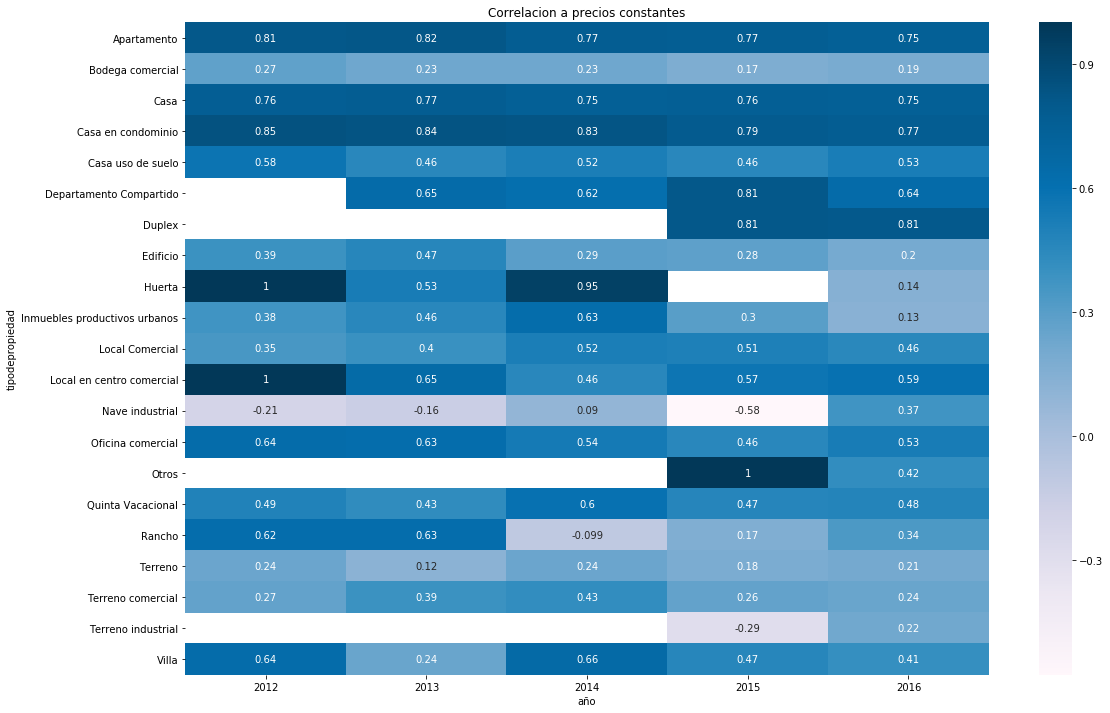

In [46]:
# Heatmap by Genre and Year
pivoted = pd.pivot_table(stackedCorrTipo,values='0',columns='año', index='tipodepropiedad')
pivoted
fig, ax = plt.subplots(figsize=(18,12))         # Sample figsize in inches
sns.heatmap(pivoted, cmap='PuBu', annot=True);
plt.title('Correlacion a precios constantes')

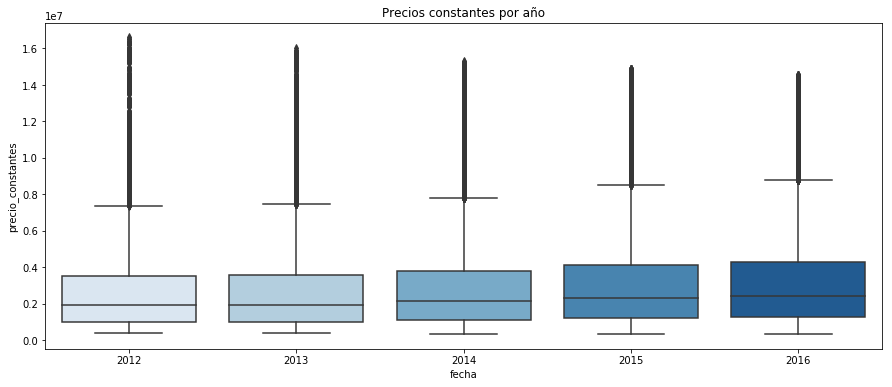

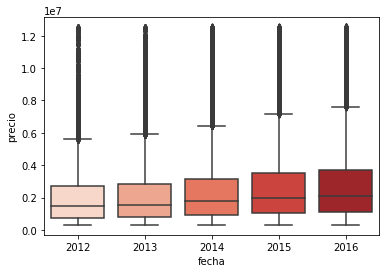

In [45]:
# Inflación mexicana
plt.figure(figsize=(15, 6))
sns.boxplot(x=df.fecha.dt.year, y='precio_constantes', data=df, palette='Blues')
plt.title("Precios constantes por año");
plt.show()
plt.close()
sns.boxplot(x=df.fecha.dt.year, y='precio', data=df, palette='Reds')

<BarContainer object of 78 artists>

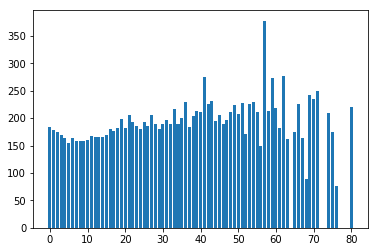

In [142]:
a = df.groupby(['antiguedad']).agg({'metrostotales':'mean'}).reset_index()
plt.bar(a['antiguedad'], a['metrostotales'])

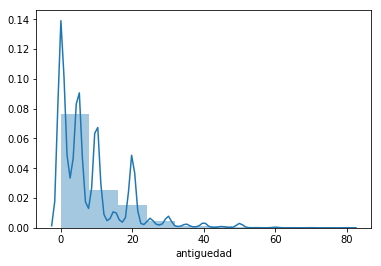

In [146]:
sns.distplot(df['antiguedad'].dropna(), bins=10)